In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

## 1. Подберите парамтеры алгоритма разрастания регионов так, чтобы был выделен весь участок газона.

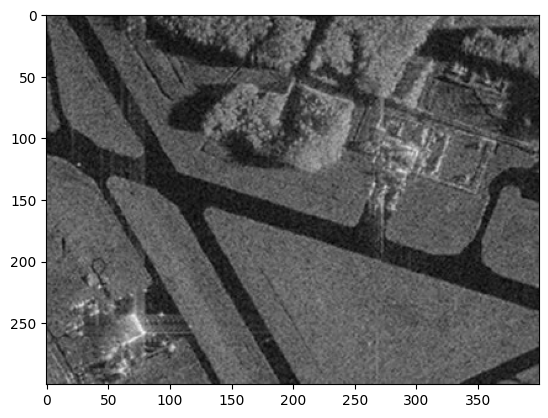

2
5
7
8
12
13
15
16
18
19
21
22
24
26
26
27
27
29
30
31
32
33
34
35
37
39
39
41
42
43
45
46
46
48
48
50
50
50
51
53
54
56
56
58
60
61
61
62
64
64
64
65
68
69
70
71
72
73
75
76
75
75
77
80
82
81
84
85
85
85
86
87
88
90
92
95
94
95
98
97
97
96
99
103
104
104
105
104
106
107
106
109
110
117
114
117
117
115
118
120
121
121
121
124
125
124
126
128
129
129
130
132
133
135
137
137
138
138
139
140
142
143
145
144
145
145
146
148
151
151
150
153
148
153
158
158
160
161
160
163
166
99
99
97
96
97
96
95
95
93
94
94
95
94
94
94
92
94
93
93
93
92
92
92
92
88
88
90
89
87
86
87
89
90
88
88
88
87
87
87
86
86
86
85
85
84
84
84
80
82
84
83
80
75
80
82
83
80
79
79
80
80
79
79
78
78
77
76
74
75
72
72
72
72
70
69
69
68
68
67
67
63
65
63
63
63
63
62
62
59
58
57
56
56
57
55
55
53
52
48
48
49
50
48
47
46
46
45
45
44
43
42
41
40
38
37
37
36
37
52
35
33
32
31
30
30
29
29
0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


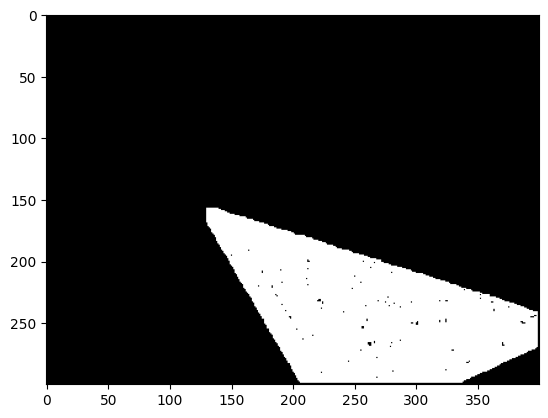

In [2]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap="gray")
plt.show()

def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])

    if abs(av_val - img[point]) <= T:
        return True

    return False


def region_growing(image, seed_point, homo_fun, r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r, image.shape[0] - r):
            for j in range(r, image.shape[1] - r):
                if mask[i, j] == 0 and mask[i - r:i + r, j - r: j + r].sum() > 0:
                    if homo_fun(image, mask, (i, j), T):
                        local_mask[i, j] = 1
        count = np.count_nonzero(local_mask)
        print(count)
        mask += local_mask

    return mask * 255

seed_point = (157,130)
mask = region_growing(image_gray,seed_point,homo_average,1, 25)
print(mask)
plt.imshow(mask, cmap='gray')
plt.show()

## 2. Реализуйте вычисление критерия однородности, отличного от представленного. Сравните результаты.

In [ ]:
def homo_median(image, mask, point, T):  # медиана вместо среднего (устойчивее к шуму, в итоге меньше черных точек на участке)
    region_vals = image[mask > 0]
    med_val = np.median(region_vals)
    return abs(med_val - image[point]) <= T


seed_point = (157,130)
mask = region_growing(image_gray,seed_point,homo_median,1, 25)
print(mask)
plt.imshow(mask, cmap='gray')
plt.show()

2
5
7
9
11
12
16
16
18
19
21
22
24
26
26
27
27
29
30
32
33
34
35
35
37
39
39
41
42
43
45
45
45
47
47
50
50
50
51
54
54
56
56
58
60
61
61
62
63
65
64
65
68
69
70
71
72
73
75
75
75
75
77
80
82
82
84
85
85
85
86
87
88
90
94
93
94
95
98
98
97
96
99
103
104
104
105
104
107
107
107
109
112
113
114
116
117
115
118
120
121
121
121


## 3. Применить алгоритм сегментации watershed+distance transform для задачи подсчета пальмовых деревьев.

In [ ]:
image = cv2.imread('palm_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")
plt.show()

ret, thresh = cv2.threshold(image_gray,0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.show()

dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
plt.imshow(dist, cmap="gray")
plt.show()

dist_blur = cv2.GaussianBlur(dist, (7,7), 0)
ret, sure_fg = cv2.threshold(dist_blur, 0.3 * dist.max(), 255, cv2.THRESH_BINARY)
plt.imshow(sure_fg, cmap="gray")
plt.show()

sure_fg = sure_fg.astype(np.uint8)
ret, markers = cv2.connectedComponents(sure_fg)
plt.imshow(markers, cmap="gray")
plt.show()

markers = cv2.watershed(image, markers)
print(len(np.unique(markers)))  # примерное кол-во пальм
plt.imshow(markers, cmap="gray")
plt.show()